In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=4)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))


Wyświetlimy je w postaci wykresu punktowego, wraz z linią dokładnie pomiędzy środkami obu rozkładów

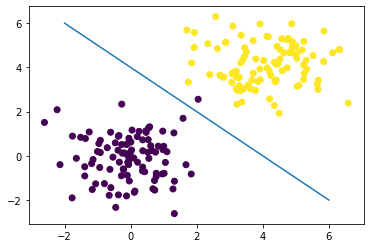

In [2]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 7), range(6, -3, -1))
plt.show()

Na tak utworzonym zbiorze wytrenujemy model SVM (z liniowym jądrem i bardzo dużą wartością współczynnika C)

In [3]:
from sklearn.svm import SVC

model = SVC(kernel='linear', C=1E10)
model.fit(train_data, train_labels)

SVC(C=10000000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

Funkcja ta zwraca meshgrid (czyli listę indeksów punktów z zadanego przedziału) na podstawie wygenerowanego zbioru danych.

In [4]:
def get_grid(data):
    x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
    y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
    return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))


Dokonujemy predykcji oraz wyświetlamy wszystkie punkty pcolormeshem, żeby zobaczyć w jaki sposób SVM dokonał podziału przestrzeni.

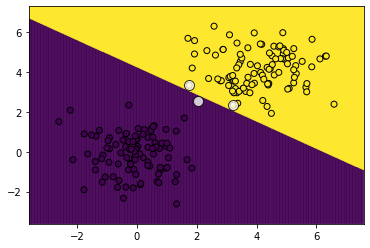

In [5]:
xs, ys = get_grid(train_data)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted, alpha=0.1)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
# plot support vectors
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='w', alpha=0.8, edgecolors='k')

plt.show()

Dodatkowo umieściliśmy tutaj wektory wsparcia (z parametru `.support_vectors_` naszego modelu.

Utworzymy też zbiór, który nie jest liniowo separowalny - księżyce.

In [6]:
from sklearn.datasets.samples_generator import make_moons
moons_data, moons_labels = make_moons(n_samples=100, noise=0.05)

Możemy tutaj porównać działanie różnych kerneli SVM. To właśnie one są główną siłą SVM. Stosując tzw. kernel trick możemy przenieść nasze dane do przestrzeni wyższego rzędu (której w zasadzie nie musimy znać! kernel sam będzie do skutku podwyższał wymiarowość danych, aż uzyska satysfakcjonującą separację z użyciem hiperpłaszczyzny).

In [7]:
model = SVC(kernel='rbf', C=1E6) # różne kernele: 'rbf', 'poly', 'sigmoid'
model.fit(moons_data, moons_labels)

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1000000.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

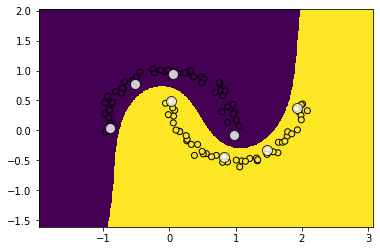

In [8]:
xs, ys = get_grid(moons_data)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(moons_data[:, 0], moons_data[:, 1], c=moons_labels, edgecolors='k')
# plot support vectors
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='w', alpha=0.8, edgecolors='k')

plt.show()

Cała dokumentacja dot. SVM znajduje się [TUTAJ](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC).

Co kiedy dane na siebie nachodzą?

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-pastel')

# losowe dane dla dwóch klas, przy przesunięciu środka rozkładu
train_data = np.vstack((np.random.normal(size=(100, 2)),
                        np.random.normal(size=(100, 2), loc=2)))
train_labels = np.hstack((np.zeros(100), np.ones(100)))


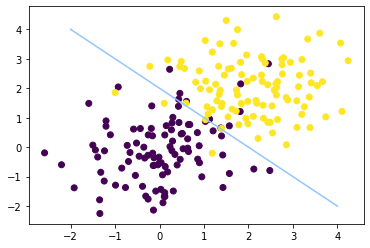

In [10]:
fig, ax = plt.subplots()
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels)
ax.plot(range(-2, 5), range(4, -3, -1))
plt.show()

Aby poradzić sobie z tym problemem wykorzystamy parametr C "łagodzący" margines - pozwalający na wystąpienie punktów wewnątrz margniesu, w celu osiągnięcia lepszej generalizacji. Duża wartość C oznacza twardy margines, zaś mniejsza pozwala na zawarcie się w nim punktów.

In [11]:
model = SVC(kernel='linear', C=1.0).fit(train_data, train_labels)

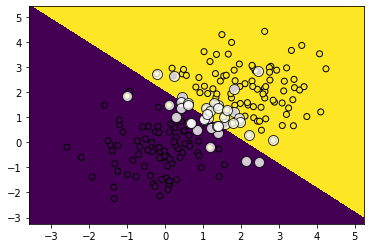

In [12]:
xs, ys = get_grid(train_data)

predicted = model.predict(
    np.column_stack((xs.flatten(),
                     ys.flatten()))).reshape(xs.shape)

fig, ax = plt.subplots()
ax.pcolormesh(xs, ys, predicted)
ax.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, edgecolors='k')
# plot support vectors
ax.scatter(model.support_vectors_[:, 0],
           model.support_vectors_[:, 1],
           s=100, linewidth=1, facecolors='w', alpha=0.8, edgecolors='k')

plt.show()

Rzeczywiste dane

In [13]:
!git clone https://github.com/PiotrJZielinski/ml-throwdown-datasets


fatal: destination path 'ml-throwdown-datasets' already exists and is not an empty directory.


In [14]:
import pandas as pd

def load_dataset(filename, class_column, index_col=None):
    dataset = pd.read_csv(f'ml-throwdown-datasets/{filename}.csv', index_col=index_col)
    dataset['class'] = dataset[class_column].astype('category').cat.codes
    classes = dataset.pop(class_column).unique()
    return dataset, classes

def prepare_dataset(dataset_name):
    params = {'iris': {'class_column': 'species', 'index_col': None},
              'wine': {'class_column': 'Class', 'index_col': None},
              'glass': {'class_column': 'Type', 'index_col': 'ID'}}
    dataset, classes = load_dataset(dataset_name,
                                    **params[dataset_name])
    y = dataset.pop('class')
    X = dataset
    return X, y, classes

In [15]:
X, y, classes = prepare_dataset('iris')

### Kroswalidacja

In [16]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# average:
#   None - wyniki dla każdej klasy osobno
#   'binary' - dla wybranej w `pos_label` etykiety
#   'micro' - dla całkowitej liczby TP, FN, FP
#   'macro' - nieważona średnia dla każdej klasy
#   'weighted' - ważona średnia dla każdej klasy

def calculate_metrics(target, prediction, average='macro'):
    accuracy = accuracy_score(target, prediction)
    precision = precision_score(target, prediction, average=average)
    recall = recall_score(target, prediction, average=average)
    f1 = f1_score(target, prediction, average=average)
    mislabeled = (target != prediction).sum()
    total = len(target)
    return accuracy, precision, recall, f1, mislabeled, total

def print_results(metrics, classifier_id='classifier'):
    print(f'Results for {classifier_id}')
    print('----')
    print(f'  Accuracy:  {metrics[0]}')
    print(f'  Precision: {metrics[1]}')
    print(f'  Recall:    {metrics[2]}')
    print(f'  F1 score:  {metrics[3]}')
    print(f'  Mislabeled {metrics[4]} out of {metrics[5]}')
    print('\n')

Results for svm + CV
----
  Accuracy:  0.98
  Precision: 0.980125383486728
  Recall:    0.98
  F1 score:  0.97999799979998
  Mislabeled 3 out of 150




/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

Text(0.5, 15.0, 'Prediction')

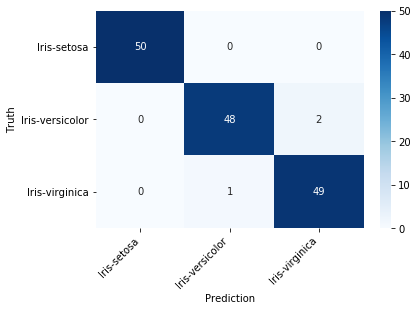

In [24]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix


cross_val = KFold(n_splits=5, shuffle=True)

predicted = []
target = []

for train_index, test_index in cross_val.split(X):
    svm = SVC()
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    svm.fit(X_train_cv, y_train_cv)
    predicted = np.concatenate((predicted, svm.predict(X_test_cv)))
    target = np.concatenate((target, y_test_cv))

print_results(calculate_metrics(target, predicted), 'svm + CV')
cm_svm = confusion_matrix(target, predicted)

cm_df = pd.DataFrame(cm_svm, index=classes, columns=classes)


g = sns.heatmap(cm_df, annot=True, cmap="Blues")
g.yaxis.set_ticklabels(g.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
g.xaxis.set_ticklabels(g.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
g.set_ylabel('Truth')
g.set_xlabel('Prediction')
    

To samo dla zbioru glass

In [25]:
X, y, classes = prepare_dataset('glass')

Results for svm + CV
----
  Accuracy:  0.5887850467289719
  Precision: 0.4607862823844397
  Recall:    0.4756907927053117
  F1 score:  0.46189027041126857
  Mislabeled 88 out of 214




/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

Text(0.5, 14.09375, 'Prediction')

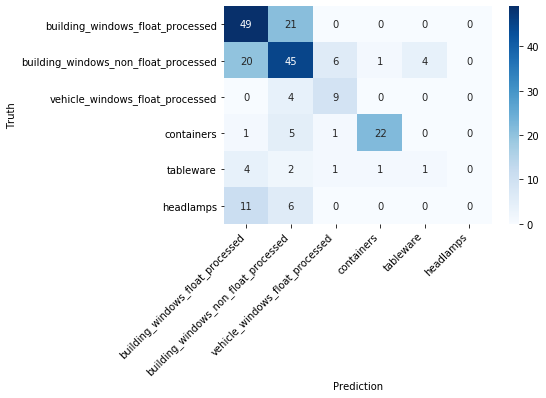

In [31]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import confusion_matrix


cross_val = StratifiedKFold(n_splits=5)

predicted = []
target = []

for train_index, test_index in cross_val.split(X, y):
    svm = SVC()
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    svm.fit(X_train_cv, y_train_cv)
    predicted = np.concatenate((predicted, svm.predict(X_test_cv)))
    target = np.concatenate((target, y_test_cv))

print_results(calculate_metrics(target, predicted), 'svm + CV')
cm_svm = confusion_matrix(target, predicted)

cm_df = pd.DataFrame(cm_svm, index=classes, columns=classes)


g = sns.heatmap(cm_df, annot=True, cmap="Blues")
g.yaxis.set_ticklabels(g.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
g.xaxis.set_ticklabels(g.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
g.set_ylabel('Truth')
g.set_xlabel('Prediction')
    

In [43]:
def plot_cm(confusion_matrix, classes):
    df = pd.DataFrame(confusion_matrix, index=classes, columns=classes)

    g = sns.heatmap(df, annot=True, cmap="Blues")
    g.yaxis.set_ticklabels(g.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=10)
    g.xaxis.set_ticklabels(g.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=10)
    g.set_ylabel('Truth')
    g.set_xlabel('Prediction')

In [48]:
def cross_validate(classifier, kfold, X, y, classes=None, params=None, talk=True):
    if params is None:
        params = {}
    if classifier.__class__.__name__ == 'ABCMeta':
        clf = classifier(**params)
    else:
        clf = classifier
    predicted = []
    target = []

    for train_index, test_index in kfold.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        clf.fit(X=X_train, y=y_train)
        predicted = np.concatenate((predicted, clf.predict(X_test)))
        target = np.concatenate((target, y_test))
    
    metrics = calculate_metrics(target, predicted)
    cm = confusion_matrix(target, predicted)
    if talk:
        print_results(metrics, clf.__class__.__name__)
        plot_cm(cm, classes)
    else:
        return metrics, cm

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

Results for SVC
----
  Accuracy:  0.5887850467289719
  Precision: 0.4607862823844397
  Recall:    0.4756907927053117
  F1 score:  0.46189027041126857
  Mislabeled 88 out of 214




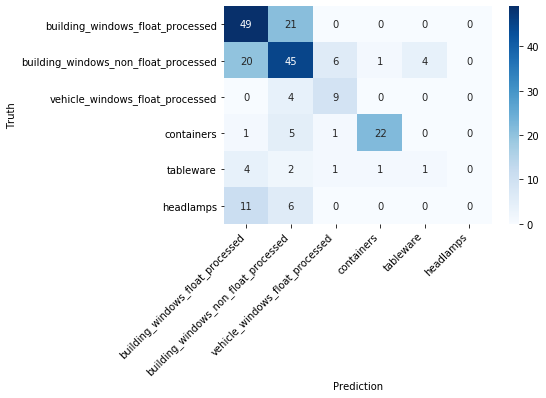

In [49]:
cross_validate(SVC, StratifiedKFold(n_splits=5), X, y, classes)

In [50]:
def plot_results(result_df, title, plot_type='bar'):
    ind = np.arange(len(result_df))
    fig, ax = plt.subplots(figsize=(20, 10))
    width = 1 / len(result_df.columns)
    if plot_type == 'bar':
        plot = lambda index, data, label: ax.bar(index, data, width=width, label=label)
    elif plot_type == 'plot':
        plot = lambda index, data, label: ax.plot(index, data, label=label)
    plot(ind, result_df['accuracy'], 'Accuracy')
    plot(ind+width, result_df['precision'], 'Precision')
    plot(ind+2*width, result_df['recall'], 'Recall')
    plot(ind+3*width, result_df['fscore'], 'fscore')
    
    ax.set_title(title)
    ax.set_ylabel('Scores')
    ax.set_xlabel(result_df.index.name)
    ax.set_xticks(ind + 3 * width / 2)
    ax.set_xticklabels(result_df.index)
    ax.autoscale()
    ax.legend()
    return ax

def test_params(X, y, classifier, classifier_param, classifier_const_params=None,
                kfold=None,
                normalizer=None):
    X = X.copy()
    if classifier_const_params is None:
        classifier_const_params = {}
    if kfold is None:
        kfold = StratifiedKFold(10)
    if normalizer is not None:
        normalizer.fit(X)
        X_preprocessed = normalizer.transform(X.values)
        X[:] = X_preprocessed
    param = list(classifier_param.keys())[0]
    data = {param: [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'fscore': [],
            'cm': []}
    for index, value in enumerate(list(classifier_param.values())[0]):
        kwargs = {param: value}
        clf = classifier(**kwargs, **classifier_const_params)
        (accuracy,
         precision,
         recall,
         fscore,
         mislabeled,
         total), cm = cross_validate(clf,
                                     kfold,
                                     X, y,
                                     talk=False)
        data[param].append(value)
        data['accuracy'].append(accuracy)
        data['precision'].append(precision)
        data['recall'].append(recall)
        data['fscore'].append(fscore)
        data['cm'].append(cm)
    
    df = pd.DataFrame(data).set_index(param)
    return plot_results(df, f'{clf.__class__.__name__} - {param}', plot_type='plot'), df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.minicond

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

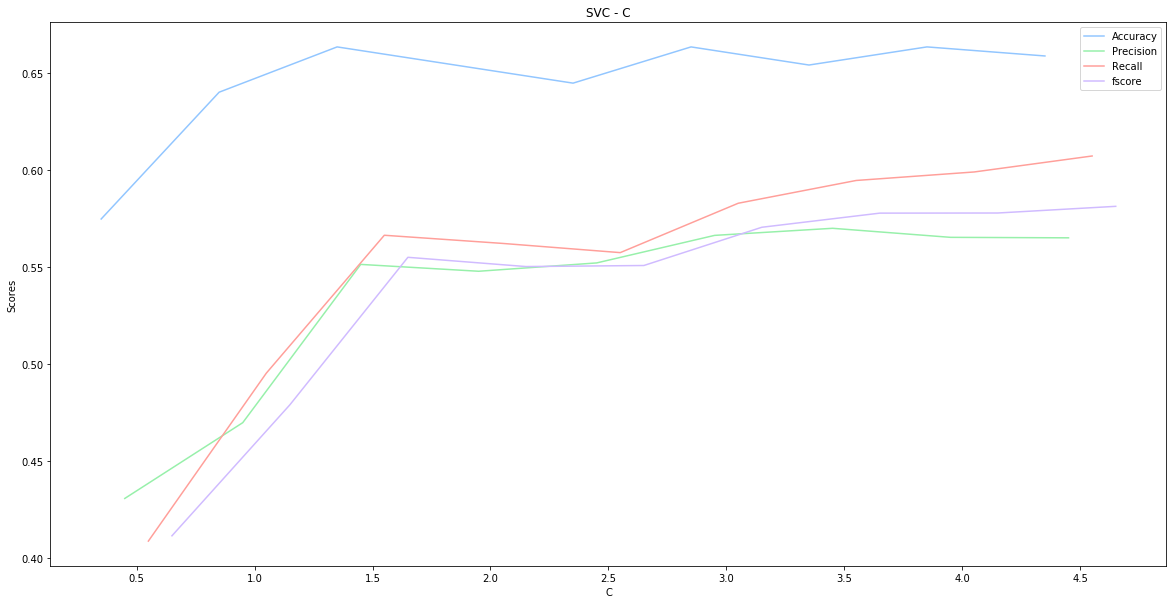

In [51]:
ax, results = test_params(X, y, SVC, {'C': np.arange(0.5, 5.0, 0.5)})

In [52]:
def test_classifiers(X, y, classifiers,
                     kfold=None,
                     normalizer=None):
    X = X.copy()
    if kfold is None:
        kfold = StratifiedKFold(10)
    if normalizer is not None:
        normalizer.fit(X)
        X_preprocessed = normalizer.transform(X.values)
        X[:] = X_preprocessed
    data = {'classifier': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'fscore': [],
            'cm': []}
    for index, classifier in enumerate(classifiers):
        name =  f"{classifier.__class__.__name__}-{index}"
        (accuracy,
         precision,
         recall,
         fscore,
         mislabeled,
         total), cm = cross_validate(classifier,
                                     kfold,
                                     X, y,
                                     talk=False)
        data['classifier'].append(name)
        data['accuracy'].append(accuracy)
        data['precision'].append(precision)
        data['recall'].append(recall)
        data['fscore'].append(fscore)
        data['cm'].append(cm)
    
    df = pd.DataFrame(data).set_index('classifier')
    return plot_results(df, 'Classifiers comparison'), df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/model_selection/_split.py:657: Warning: The least populated class in y has only 9 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solve

(<matplotlib.axes._subplots.AxesSubplot at 0x1a28c061d0>,
                       accuracy  precision    recall    fscore  \
 classifier                                                      
 LogisticRegression-0  0.602804   0.479770  0.460050  0.459358   
 SVC-1                 0.640187   0.469682  0.495243  0.478931   
 
                                                                      cm  
 classifier                                                               
 LogisticRegression-0  [[51, 19, 0, 0, 0, 0], [22, 46, 6, 0, 2, 0], [...  
 SVC-1                 [[55, 15, 0, 0, 0, 0], [18, 50, 3, 1, 4, 0], [...  )

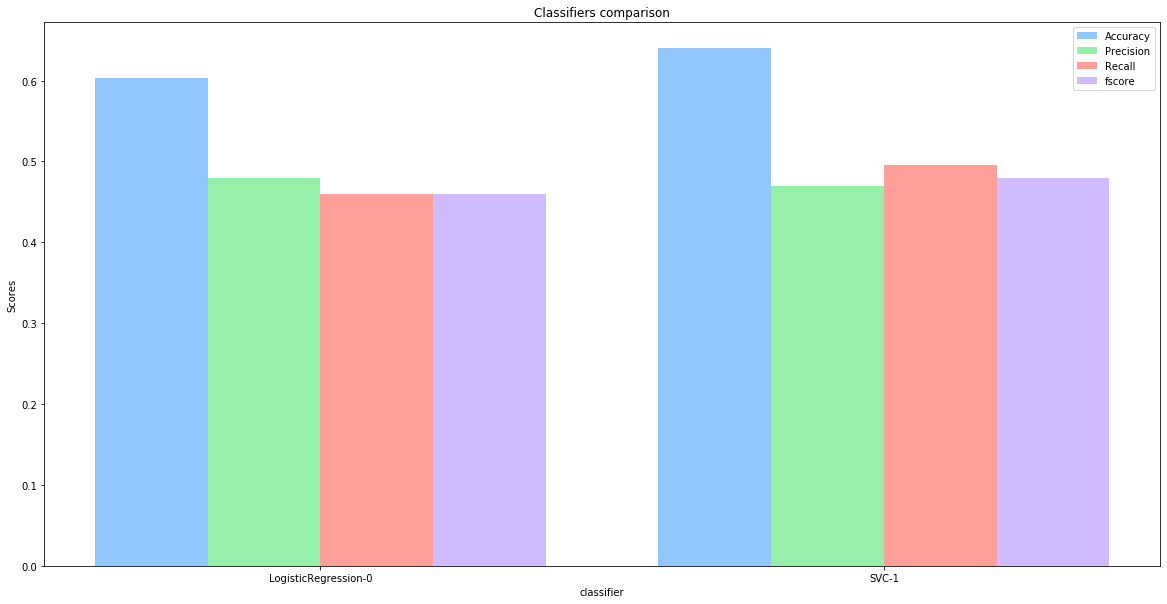

In [54]:
from sklearn.linear_model import LogisticRegression

test_classifiers(X, y, [LogisticRegression(), SVC()])

In [55]:
def test_folds(X, y, classifier, folds, kfold=None,
               normalizer=None):
    X = X.copy()
    if kfold is None:
        kfold = StratifiedKFold
    if normalizer is not None:
        normalizer.fit(X)
        X_preprocessed = normalizer.transform(X.values)
        X[:] = X_preprocessed
    data = {'folds': folds,
            'accuracy': [],
            'precision': [],
            'recall': [],
            'fscore': [],
            'cm': []}
    for n in folds:
        (accuracy,
         precision,
         recall,
         fscore,
         mislabeled,
         total), cm = cross_validate(classifier,
                                     kfold(n),
                                     X, y,
                                     talk=False)
        data['accuracy'].append(accuracy)
        data['precision'].append(precision)
        data['recall'].append(recall)
        data['fscore'].append(fscore)
        data['cm'].append(cm)
    
    df = pd.DataFrame(data).set_index('folds')
    return plot_results(df, 'Number of folds', plot_type='plot'), df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-pac

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-pac

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

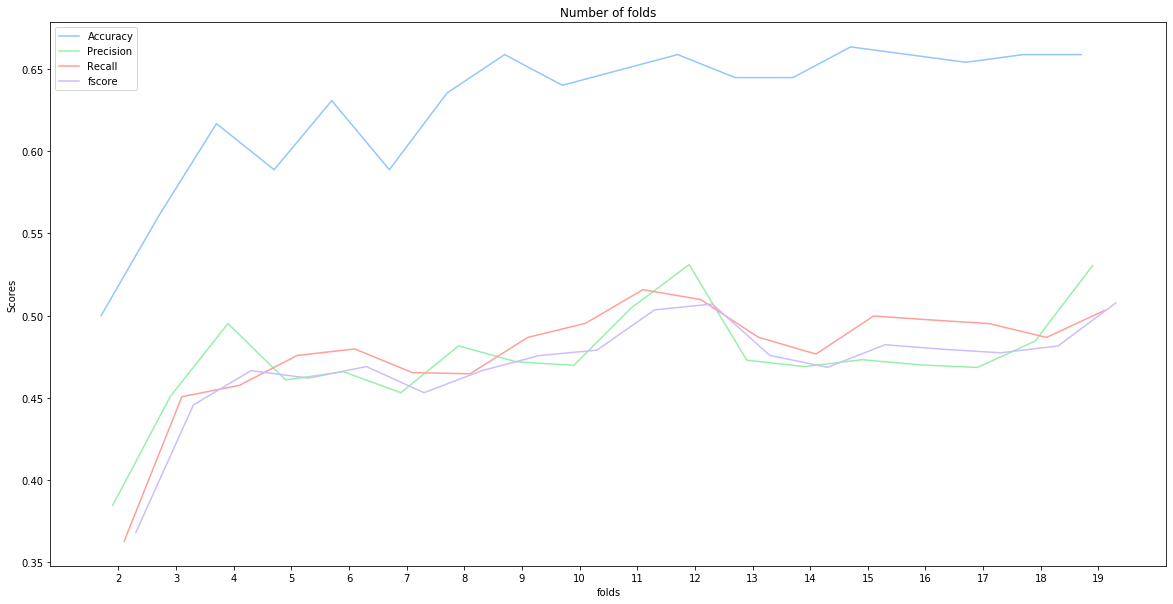

,accuracy,precision,recall,fscore,cm
folds,,,,,
2,0.500000,0.384433,0.362681,0.367856,"[[39, 31, 0, 0, 0, 0], [28, 42, 3, 0, 3, 0], [..."
3,0.560748,0.450789,0.450590,0.445582,"[[42, 28, 0, 0, 0, 0], [19, 47, 5, 1, 4, 0], [..."
4,0.616822,0.495148,0.457530,0.466436,"[[52, 18, 0, 0, 0, 0], [19, 51, 3, 0, 3, 0], [..."
5,0.588785,0.460786,0.475691,0.461890,"[[49, 21, 0, 0, 0, 0], [20, 45, 6, 1, 4, 0], [..."
6,0.630841,0.465823,0.479666,0.468939,"[[52, 18, 0, 0, 0, 0], [18, 52, 3, 0, 3, 0], [..."
7,0.588785,0.453035,0.465251,0.453038,"[[50, 20, 0, 0, 0, 0], [19, 45, 7, 1, 4, 0], [..."
8,0.635514,0.481532,0.464534,0.466378,"[[54, 16, 0, 0, 0, 0], [19, 52, 2, 1, 2, 0], [..."
9,0.658879,0.471841,0.486690,0.475647,"[[57, 13, 0, 0, 0, 0], [19, 53, 3, 0, 1, 0], [..."
10,0.640187,0.469682,0.495243,0.478931,"[[55, 15, 0, 0, 0, 0], [18, 50, 3, 1, 4, 0], [..."


In [57]:
ax, df = test_folds(X, y, SVC, range(2,20,1), kfold=StratifiedKFold)
plt.show()
df

In [58]:
def test_cross_val(X, y, classifier, kfolds,
               normalizer=None):
    X = X.copy()
    if normalizer is not None:
        normalizer.fit(X)
        X_preprocessed = normalizer.transform(X.values)
        X[:] = X_preprocessed
    data = {'cross_val': [],
            'accuracy': [],
            'precision': [],
            'recall': [],
            'fscore': [],
            'cm': []}
    for index, kfold in enumerate(kfolds):
        name = f'{kfold.__class__.__name__}-{kfold.n_splits}_{index}'
        (accuracy,
         precision,
         recall,
         fscore,
         mislabeled,
         total), cm = cross_validate(classifier,
                                     kfold,
                                     X, y,
                                     talk=False)
        data['cross_val'].append(name)
        data['accuracy'].append(accuracy)
        data['precision'].append(precision)
        data['recall'].append(recall)
        data['fscore'].append(fscore)
        data['cm'].append(cm)
    
    df = pd.DataFrame(data).set_index('cross_val')
    return plot_results(df, 'Cross-validation method'), df

/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/piotrz/.miniconda3/envs/ds-training/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarn

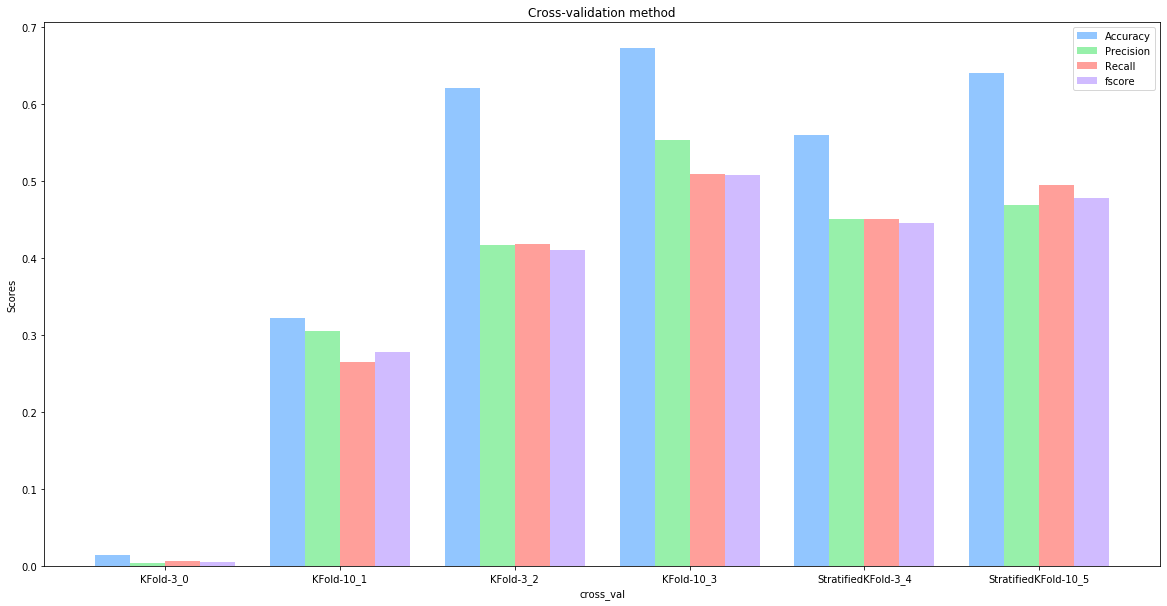

,accuracy,precision,recall,fscore,cm
cross_val,,,,,
KFold-3_0,0.014019,0.004237,0.006579,0.005155,"[[0, 65, 0, 0, 0, 5], [59, 3, 7, 3, 4, 0], [0,..."
KFold-10_1,0.322430,0.305314,0.264961,0.277929,"[[19, 51, 0, 0, 0, 0], [44, 25, 3, 1, 3, 0], [..."
KFold-3_2,0.621495,0.417423,0.418247,0.410406,"[[50, 20, 0, 0, 0, 0], [17, 56, 2, 0, 1, 0], [..."
KFold-10_3,0.672897,0.554068,0.509595,0.508159,"[[57, 13, 0, 0, 0, 0], [18, 55, 3, 0, 0, 0], [..."
StratifiedKFold-3_4,0.560748,0.450789,0.450590,0.445582,"[[42, 28, 0, 0, 0, 0], [19, 47, 5, 1, 4, 0], [..."
StratifiedKFold-10_5,0.640187,0.469682,0.495243,0.478931,"[[55, 15, 0, 0, 0, 0], [18, 50, 3, 1, 4, 0], [..."


In [59]:
ax, df = test_cross_val(X, y, SVC(), [KFold(3, False), KFold(10, False), KFold(3, True), KFold(10, True), StratifiedKFold(3), StratifiedKFold(10)])
plt.show()
df